# California House Pricing

<img src="flow_chart.png" height=200px width=800px></img>

## 01: Framing the problem

Build a model of housing prices in California using the California using the Calidornia census data. This data has metrics such as the population, median income, medina housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data.

## 02 : Obtain Data

#### Importing the basic required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
%matplotlib inline

#### Reading the data from CSV file

In [2]:
housing_data = pd.read_csv('housing.csv')

## 03 : Analyze Data

#### Obtaining a glimpse of data

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Generating a Correlation heatmap

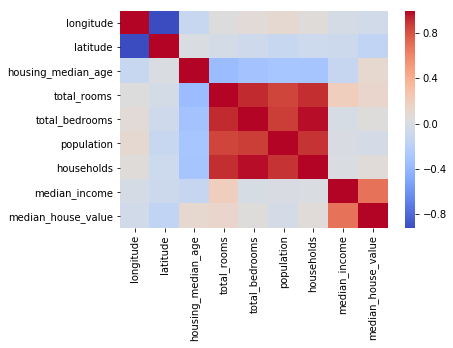

In [6]:
corr = housing_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='coolwarm')

#### Generating a StripPlot heatmap

In [7]:
corr = housing_data.corr()

In [8]:
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


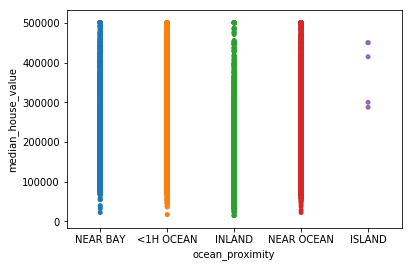

In [9]:
sns.stripplot(x="ocean_proximity", y="median_house_value", data=housing_data)

## 04 : Feature Engineering

#### Fill the missing values in the obtained data

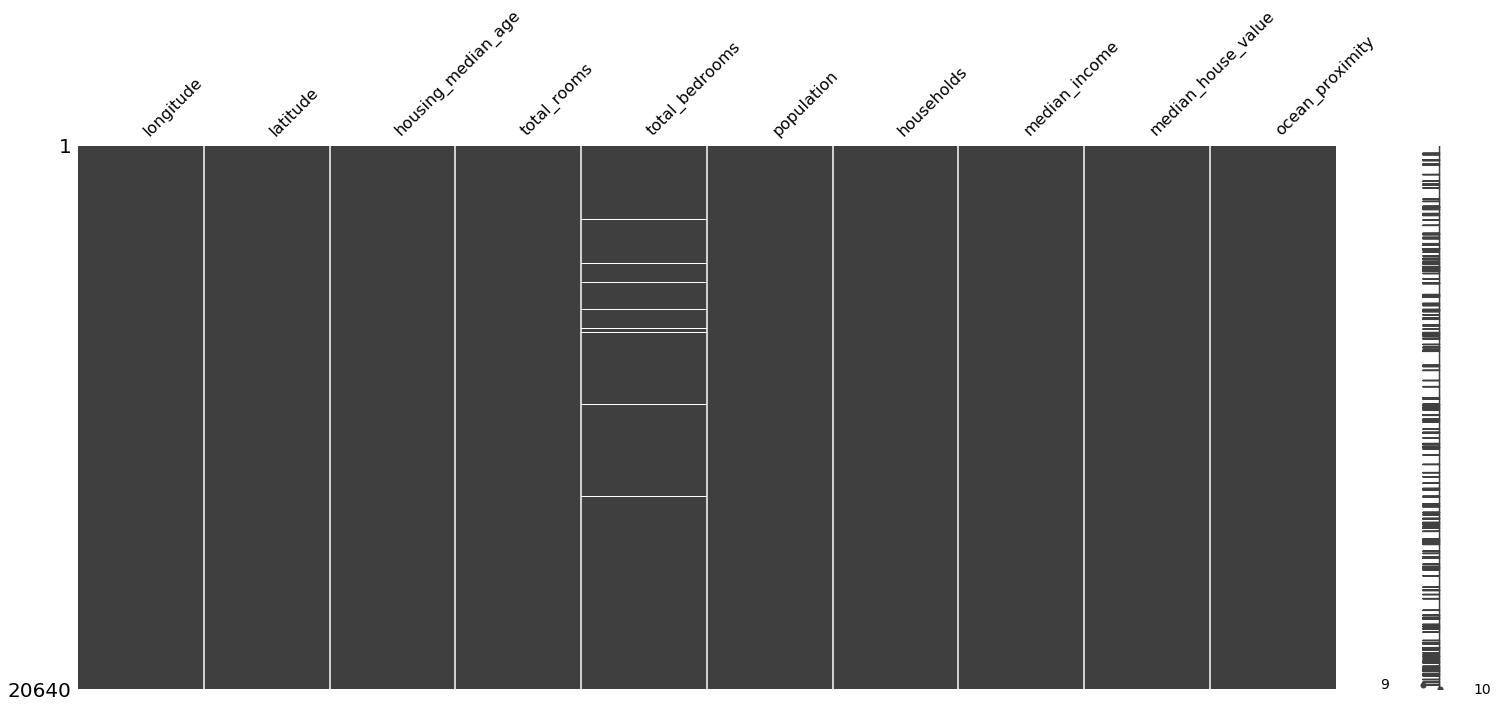

In [10]:
ms.matrix(housing_data)

#Visualize the data to see if there are any missing values

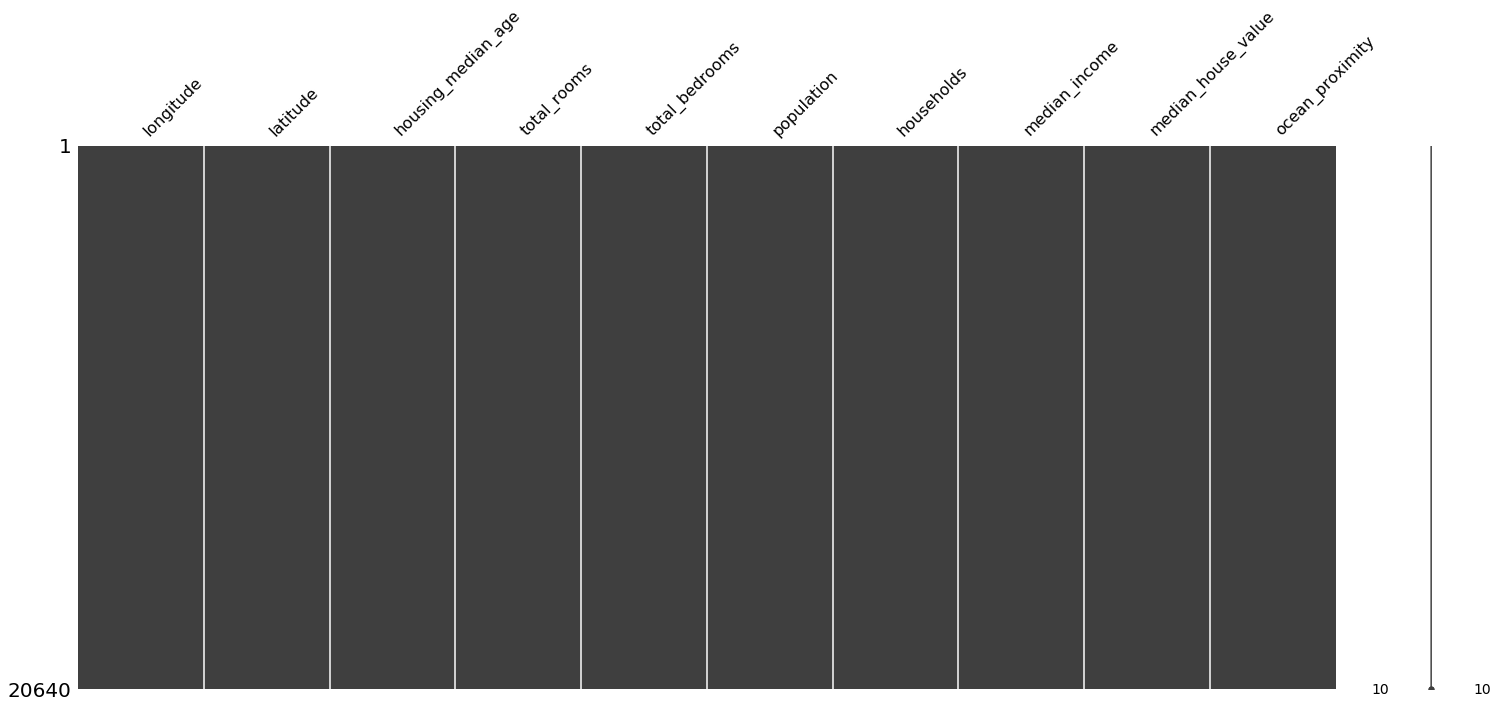

In [11]:
#Fill the missing values
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].mean(), inplace=True)
ms.matrix(housing_data)

### Categorical value conversion

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238848EF470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023884E00F60>]], dtype=object)

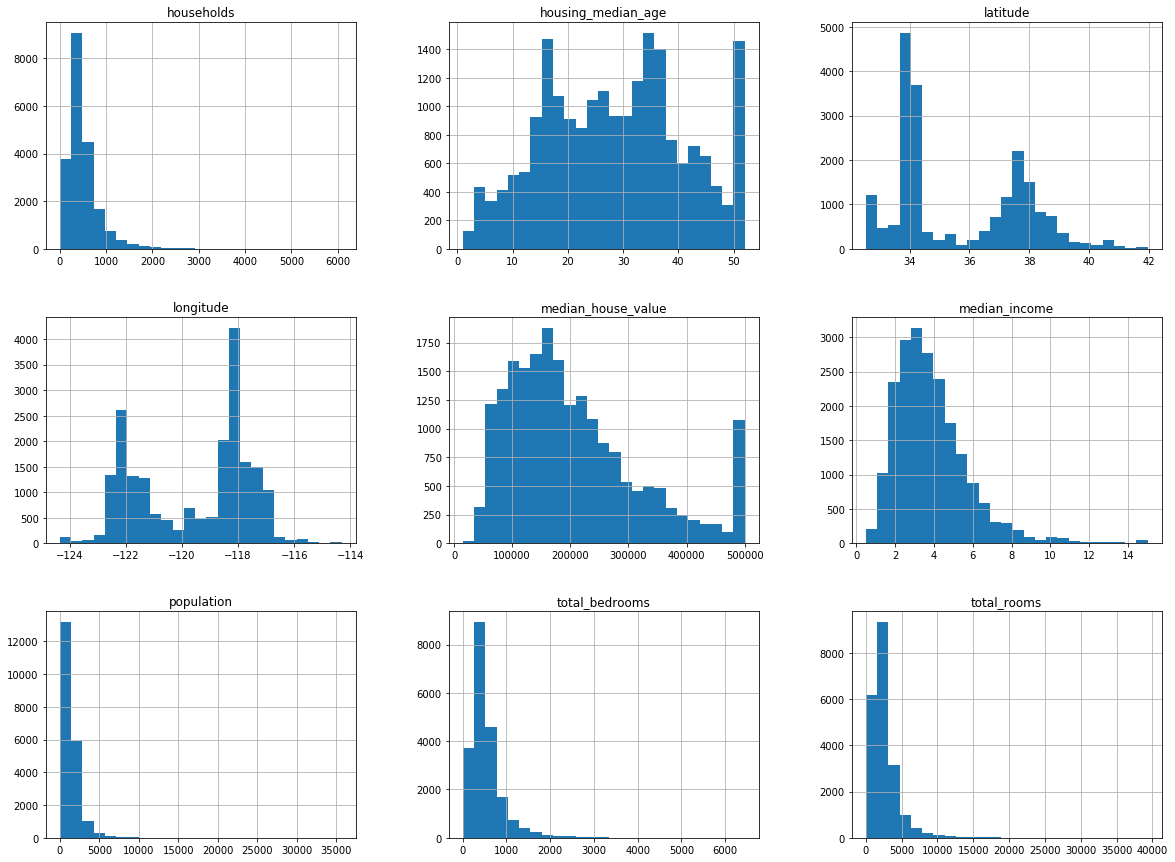

In [12]:
housing_data.hist(bins=25, figsize=(20,15))

In [13]:
#get_dummies() is used to convert the 'ocean_proximity', a column with categorical values, into numerical values
df = pd.get_dummies(housing_data['ocean_proximity'], drop_first=1)
housing_data.drop('ocean_proximity', inplace=True, axis=1)
#concatinating the dataframe with dummy columns of 'ocean_proximity' to housing_data
housing_data = pd.concat([housing_data, df], axis=1)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [14]:
import math
housing_data['total_bedrooms'] = list(map(math.ceil,(housing_data['total_bedrooms'])))

In [15]:
#Since we have created dummy columns for 'ocean_proximity', we are dropping the column

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null int64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
INLAND                20640 non-null uint8
ISLAND                20640 non-null uint8
NEAR BAY              20640 non-null uint8
NEAR OCEAN            20640 non-null uint8
dtypes: float64(8), int64(1), uint8(4)
memory usage: 1.5 MB


In [16]:
#dataframe.columns returns a list of all the columns in the dataframe
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

## 05 : Model Selection

### Train-Test Split

<img src = "supervised_flow_chart.png"></img>

In [18]:
X = housing_data[['longitude', 'latitude', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]

y = housing_data['median_house_value']

#Importing the train_test_split from sklearn to split the dataset for training and testing
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Linear Regression

#### Training the model

In [19]:
#Import LinearRegression from sklearn
from sklearn.ensemble import RandomForestRegressor

#Initializing the model
lm = RandomForestRegressor()

#Fit the data to the algorithm
lm.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Predicting the model on the test set

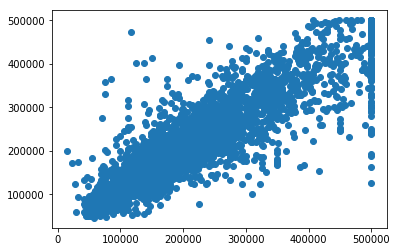

In [20]:
#Generating a Scatter Plot to evaluate the correctness of validation set against the predicted data
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

## 06 : Evaluate the predictions

In [21]:
from sklearn import metrics
#Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

#Mean Square Error
print('MSE:', metrics.mean_squared_error(y_test, predictions))

#Mean Square Root Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 32712.7338905
MSE: 2493376022.67
RMSE: 49933.7162914


## 07 : Predicting on Validation set
### This problem doesn't have a validation set.

---
                                    THE END